# A Short Introduction to netCDF 


## What is  netCDF?

_"NetCDF is an abstraction that supports a view of data as a collection of self-describing, portable objects that can be accessed through a simple interface. Array values may be accessed directly, without knowing details of how the data are stored. Auxiliary information about the data, such as what units are used, may be stored with the data. Generic utilities and application programs can access netCDF datasets and transform, combine, analyze, or display specified fields of the data. The development of such applications has led to improved accessibility of data and improved re-usability of software for array-oriented data management, analysis, and display."_ from http://www.unidata.ucar.edu/software/netcdf/docs/netcdf_introduction.html


## Data Heirarchy

netCDF files are arranged in a organized 'Dataset' heiarchy consisting of groups, dimensions, variables and attributes. For todays example we will ignore groups, but think of groups as sub-containers which hold their own dimensions, variables and attributes. Dimensions, variables and attributes will be discussed below but a general layout of a possible netCDF dataset may look like;

<img src="netCDF_Heirarchy.png">



## netCDF Files Operations
The first thing we need to do is create a new netCDF 'Dataset' by opening a netCDF file for reading from or writing to. 
We will use three parameters to create our Dataset file; file name, mode, and format. (eg. Dataset('filename', mode, format))

### mode
- 'w' will write a new file. Note it will over write any file with the same file name (this can be be prevented by setting the 'clobber' parameter to false)
- 'a' appends data to a file
- 'r' reads data from a file (default setting)

### format
- 'NETCDF3_CLASSIC', 
- 'NETCDF3_64BIT', 
- 'NETCDF4_CLASSIC' uses HDF5 for the underlying storage layer but enforces the classic netCDF 3 data model.
- 'NETCDF4' also uses HDF5 but uses the new netCDF4 model(default setting) 


## Goal
Want we want to do is open one netCDF Dataset, grab the data of interest, and plot it with matplotlib



In [3]:
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma

filename = "tos_O1_2001-2002.nc"
ds = Dataset(filename, mode="r")

### Getting to know your data



In [4]:
print(ds)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dim

### Using the meta-data in a program

In [5]:
md = ds.__dict__
for k in md:
    print("{0}: {1}".format(k, md[k]))

title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
project_id: IPCC Fourth Assessment
table_id: Table O1 (13 November 2004)
experiment_id: SRES A2 experiment
realization: 1
cmor_version: 0.959999978542
Conventions: CF-1.0
history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
comment: Test drive


In [6]:
print(ds.dimensions)

OrderedDict([(u'lon', <type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180
), (u'lat', <type 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 170
), (u'time', <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24
), (u'bnds', <type 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
)])


In [7]:
print(ds.variables['tos'])

<type 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling off



## Reading in the data

- time
- latitude
- longitude
- Sea surface temperature

- netCDF `variable` is used to read and write array data. They are similar to numpy array

In [17]:
time = ds.variables['time']
print(time)
print(time[:])
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
tos = ds.variables["tos"][:,:,:]
print(tos[0,:,:])

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 2001-1-1
    axis: T
    calendar: 360_day
    bounds: time_bnds
    original_units: seconds since 2001-1-1
unlimited dimensions: time
current shape = (24,)
filling off

[  15.   45.   75.  105.  135.  165.  195.  225.  255.  285.  315.  345.
  375.  405.  435.  465.  495.  525.  555.  585.  615.  645.  675.  705.]
[[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [271.4374694824219 271.4379577636719 271.43841552734375 ...,
  271.4361877441406 271.4365539550781 271.4369812011719]
 [271.4451904296875 271.44525146484375 271.4453125 ..., 271.445068359375
  271.4450988769531 271.44512939453125]
 [271.4591979980469 271.45916748046875 271.4591369628906 ...,
  271.459228515625 271.459228515625 271.4591979980469]]


### Computing on the data

In [9]:
print ('time from {0} to {1}'.format(time[0], time[-1]))
tos_min = ma.min(tos)
tos_max = ma.max(tos)
tos_avg = ma.average(tos)
tos_med = ma.median(tos)[0]
print("Sea surface temperature: min={0}, max={1}".format(tos_min, tos_max))
print("Sea surface temperature: average={0}, median={1}".format(tos_avg, tos_med))


time from 15.0 to 705.0
Sea surface temperature: min=271.17086792, max=305.503753662
Sea surface temperature: average=286.697360518, median=285.489929199


## Plotting a contour plot

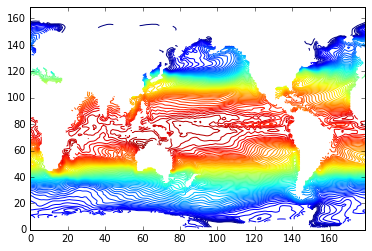

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
cp = plt.contour(tos[12,:,:], 100)

### Adding a color bar and label

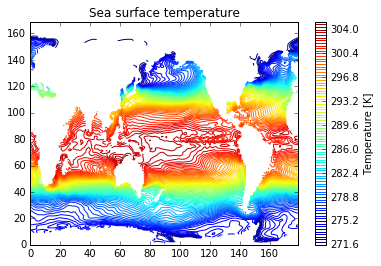

In [11]:
cp = plt.contour(tos[12,:,:], 100)
cbar = plt.colorbar(cp)
cbar.set_label("Temperature [K]")
plt.title("Sea surface temperature")

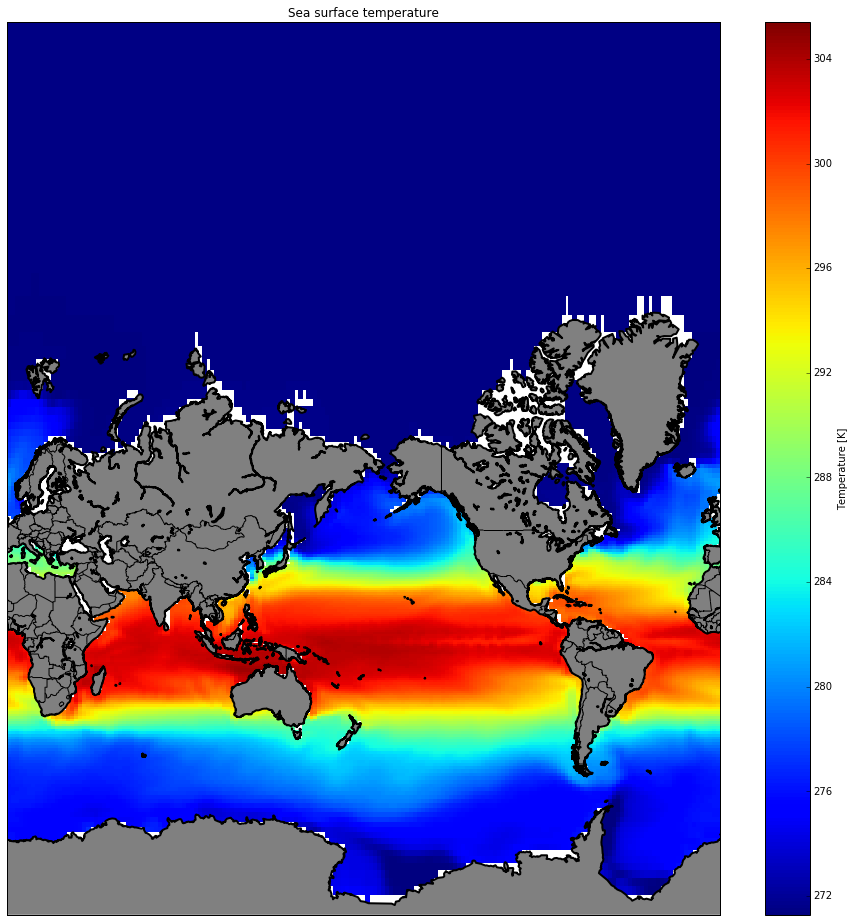

In [12]:
from mpl_toolkits.basemap import Basemap

fig=plt.figure(figsize=(16,16))

# Create the map
m = Basemap(llcrnrlon=np.min(lons),llcrnrlat=np.min(lats),\
            urcrnrlon=np.max(lons),urcrnrlat=np.max(lats),\
            projection='merc',resolution='l')

m.drawcoastlines(linewidth=2)
m.fillcontinents(color='gray')
m.drawcountries(linewidth=1)

plons, plats = np.meshgrid(lons, lats)
x, y = m(plons, plats)
cp = m.pcolor(x,y,tos[12,:,:])
cbar = plt.colorbar(cp)
cbar.set_label("Temperature [K]")
plt.title("Sea surface temperature")
plt.show()